In [6]:
import fileinput
with open('tolstoy.txt', 'w') as fout:
    fin = fileinput.input('tom_1.txt', 'tom_2.txt', 'tom_3.txt', 'tom_4.txt')
    for line in fin:
        fout.write(line)
    fin.close()

In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [24]:
with open('tom_1.txt', 'r', encoding='utf-8') as f:
    text1 = f.read().lower()
text1 = re.sub('[^а-я ]','', text1)

In [25]:
with open('tom_2.txt', 'r', encoding='utf-8') as f1:
    text2 = f1.read().lower()
text2 = re.sub('[^а-я ]','', text2)

In [26]:
with open('tom_3.txt', 'r', encoding='utf-8') as f:
    text3 = f.read().lower()
text3 = re.sub('[^а-я ]','', text3)

In [27]:
with open('tom_4.txt', 'r', encoding='utf-8') as f:
    text4 = f.read().lower()
text4 = re.sub('[^а-я ]','', text4)

In [28]:
text = text1 + text2 + text3 + text4

In [29]:
RUS = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUS)}

In [30]:
probabilities = np.zeros((len(RUS), len(RUS)))

In [31]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [32]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [33]:
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))

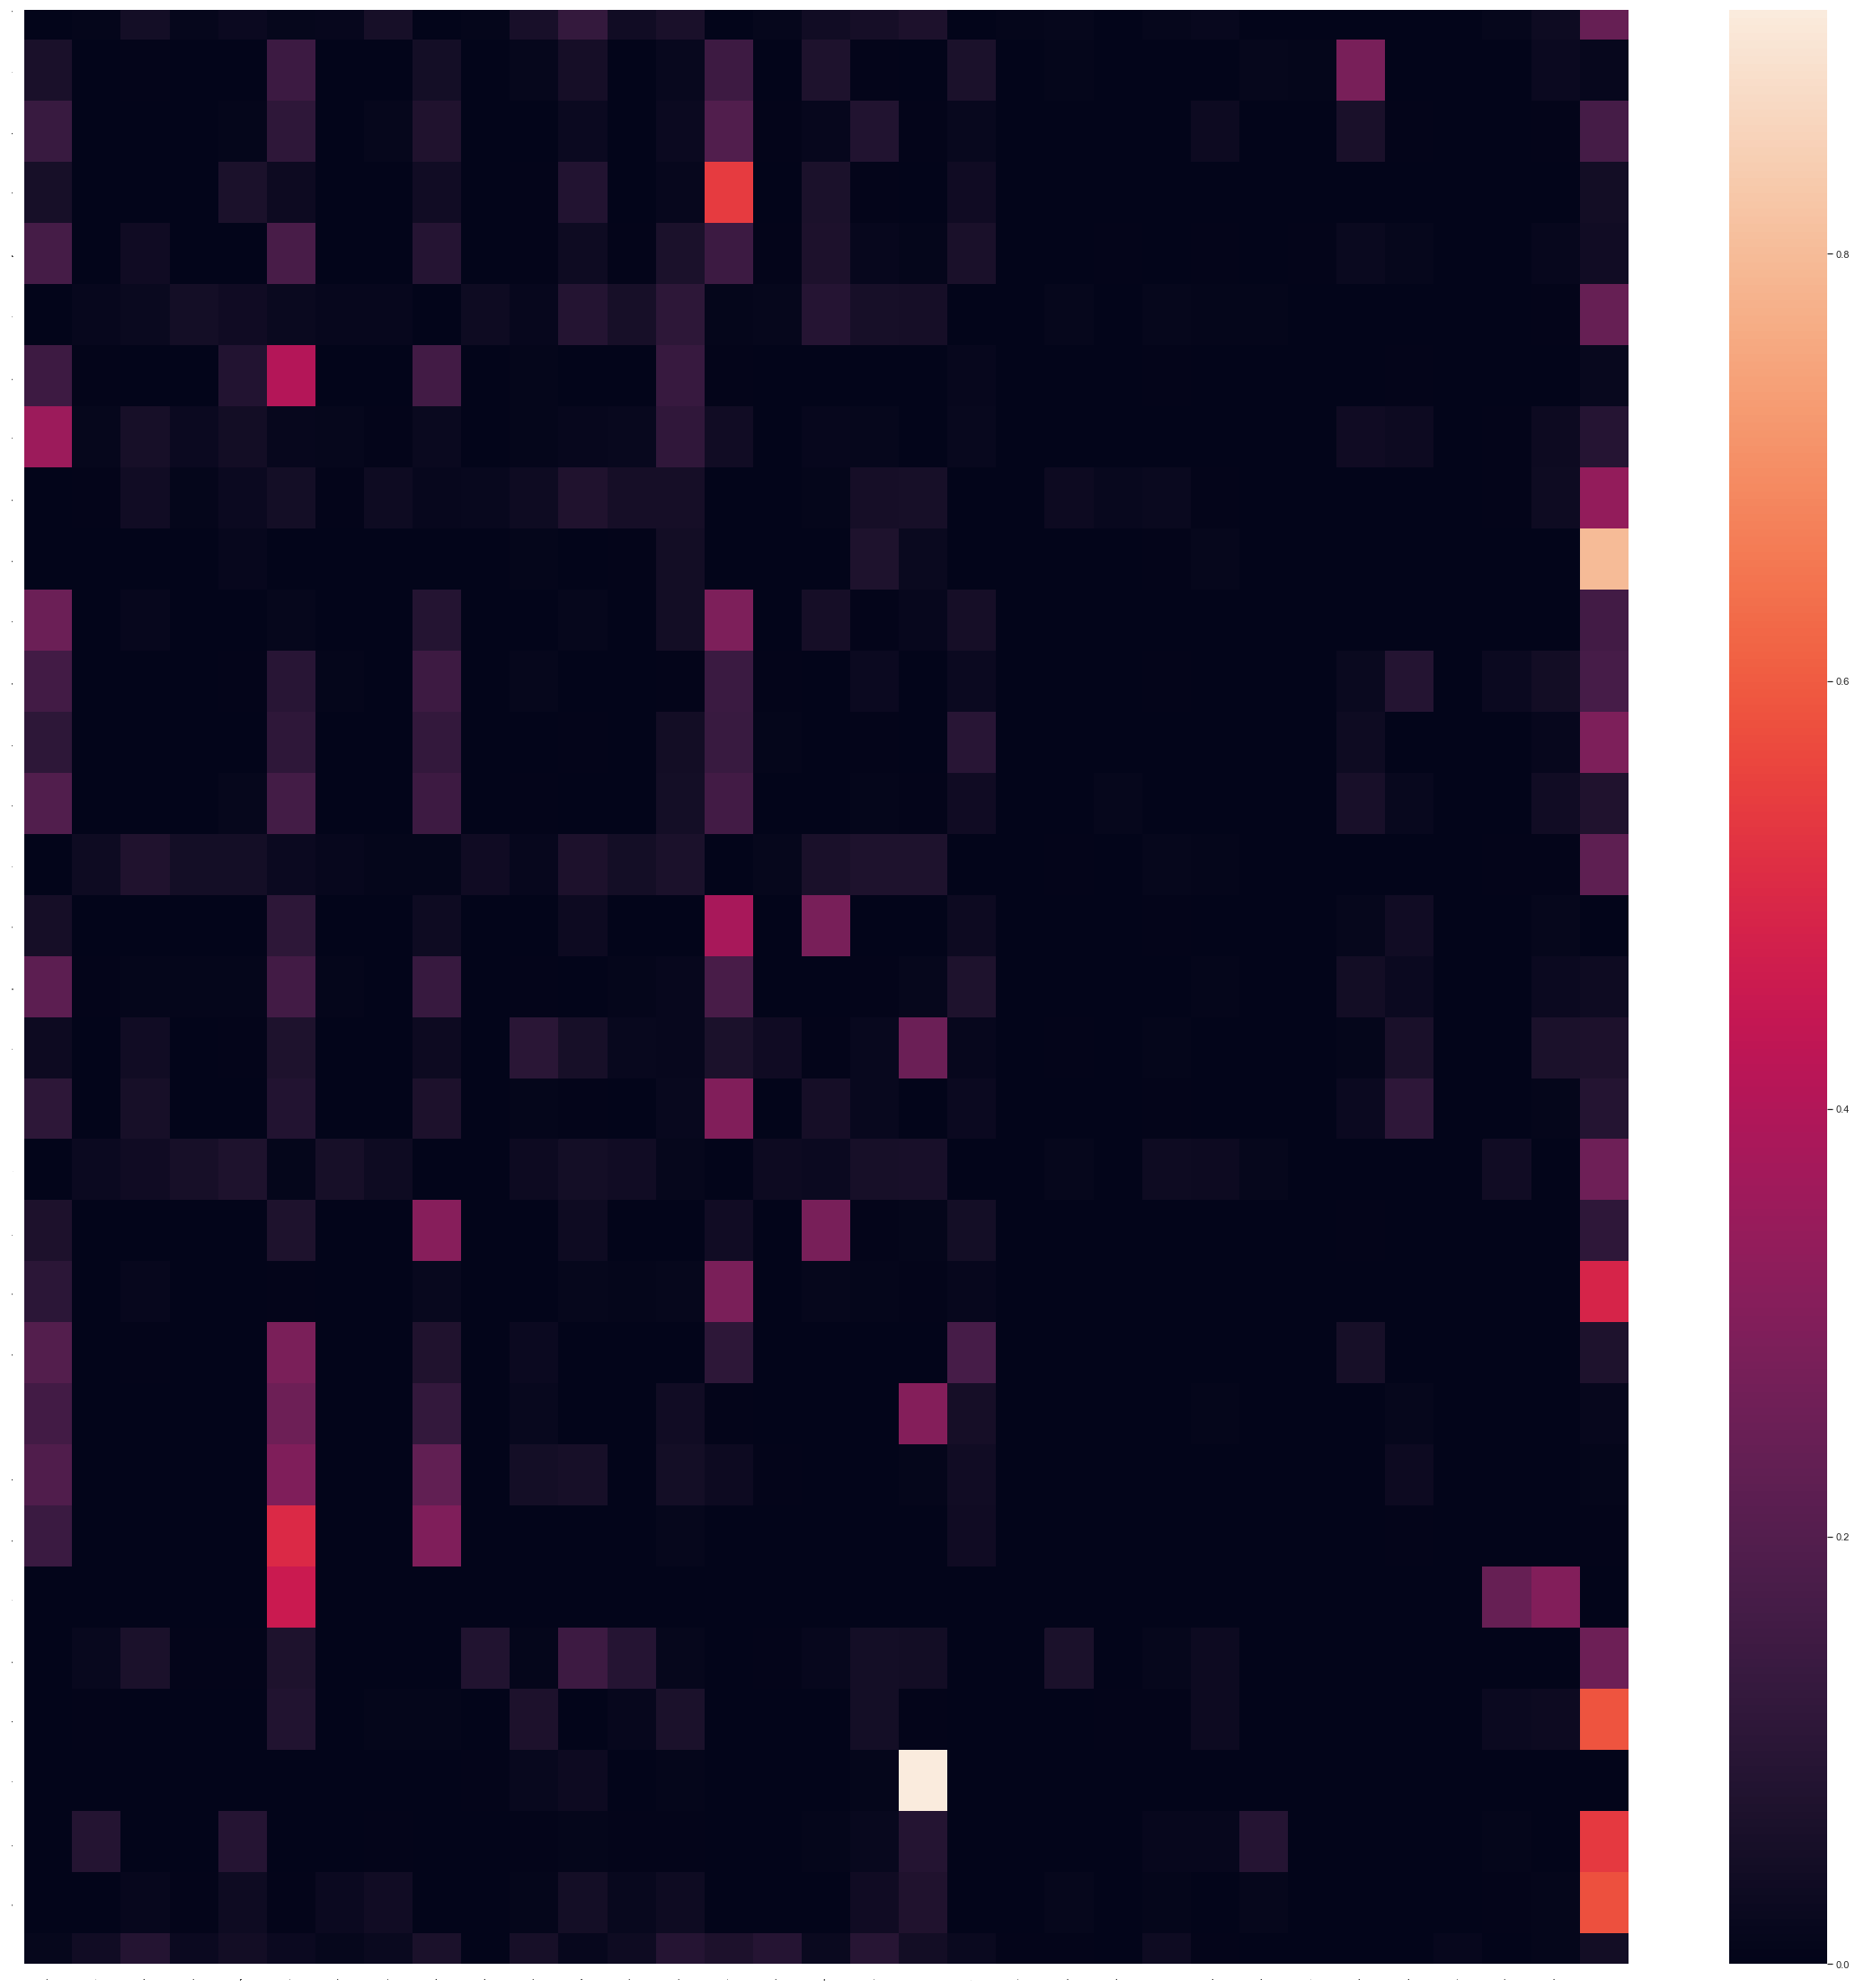

In [35]:
plt.figure(figsize=(40,40))
sns.heatmap(df)
plt.show()

In [45]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUS)
proba_all = 0
for c1 in RUS:
    for c2 in RUS:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        if proba > 0:
            print(''.join(['п', c1, c2, 'р']), proba)
            proba_all = proba_all + proba

паар 1.209151334334995e-08
пабр 9.791899453193205e-07
павр 1.2563367941744452e-06
пагр 1.21164350764174e-06
падр 2.791512483418374e-06
паер 2.0084939876042973e-06
пажр 9.578838330207824e-09
пазр 1.3583944000672686e-06
паир 2.245141081751936e-08
пайр 9.610826708547314e-09
пакр 4.781721955590425e-06
палр 4.509909235182344e-09
памр 1.1274756761933116e-07
панр 1.2561765713064774e-07
паор 4.0107757448556895e-08
папр 6.139094699457418e-06
парр 1.2060174216533007e-08
паср 5.191246068479684e-07
патр 5.520699738638321e-06
паур 6.999750917463991e-08
пафр 3.378596256317731e-06
пахр 2.5672712557313986e-07
пачр 2.595028945871131e-08
пашр 3.805823761487175e-09
пащр 4.987572578068641e-09
паэр 1.1243967796658801e-10
паюр 1.4989421232171037e-07
паяр 1.5803437841254376e-07
па р 8.882733373287707e-06
пвар 3.757515283807125e-09
пвбр 2.1162614914575367e-11
пввр 1.2510993897448732e-11
пвгр 4.616639664395516e-11
пвдр 3.5427190179222596e-10
пвер 6.6424027107670545e-09
пвжр 8.755712500772505e-15
пвзр 1.2244421

In [46]:
print(''.join(['Суммарная вероятность встретить "п**р"  ']), proba_all)

Суммарная вероятность встретить "п**р"   0.0009689033966371754


In [63]:
s = []
start = 'б'
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUS), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бивотолю


## Оценка ряда через НММ

In [45]:
series = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")['Deg']
values = series.values.reshape(-1,1)

from hmmlearn.hmm import GaussianHMM

In [42]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582104
2 -820.6341453620569
3 -786.8375332667733
4 -752.0201472668961
5 -737.1181370072987
6 -729.5671112589446
7 -713.7233778326262
8 -702.1073061994878
9 -690.9838068209662
10 

Fitting a model with 167 free scalar parameters with only 162 data points will result in a degenerate solution.


-691.7513132379465
11 -682.0094696781584


Fitting a model with 194 free scalar parameters with only 162 data points will result in a degenerate solution.


12 -675.3501280160797
13 -659.7217307627267


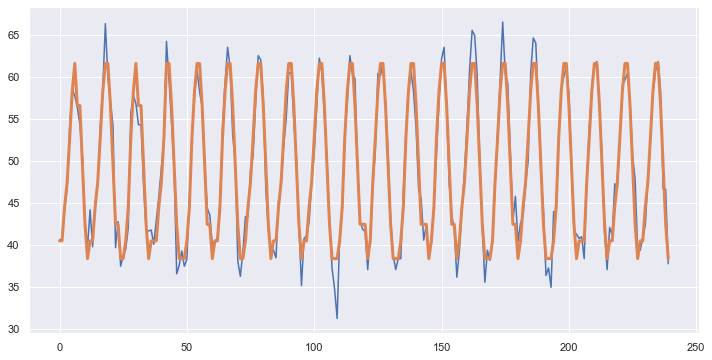

In [21]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [9]:
optimal_n = []
for n in range(1, 15):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    optimal_n.append(model.score(values))

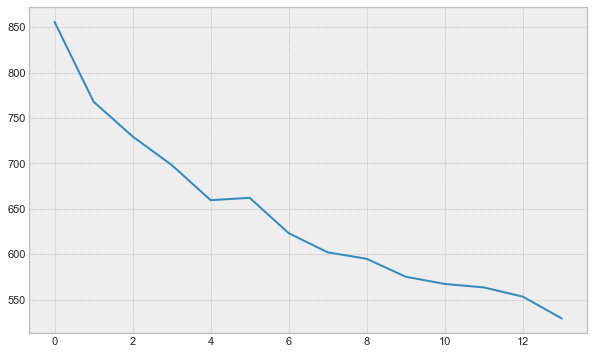

In [11]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10,6))
    plt.plot(optimal_n*np.array([-1]))

Оптимально взять n = 4. 

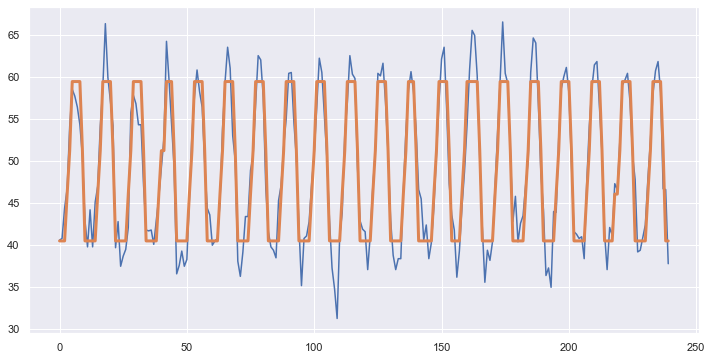

In [47]:
model = GaussianHMM(n_components=4,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

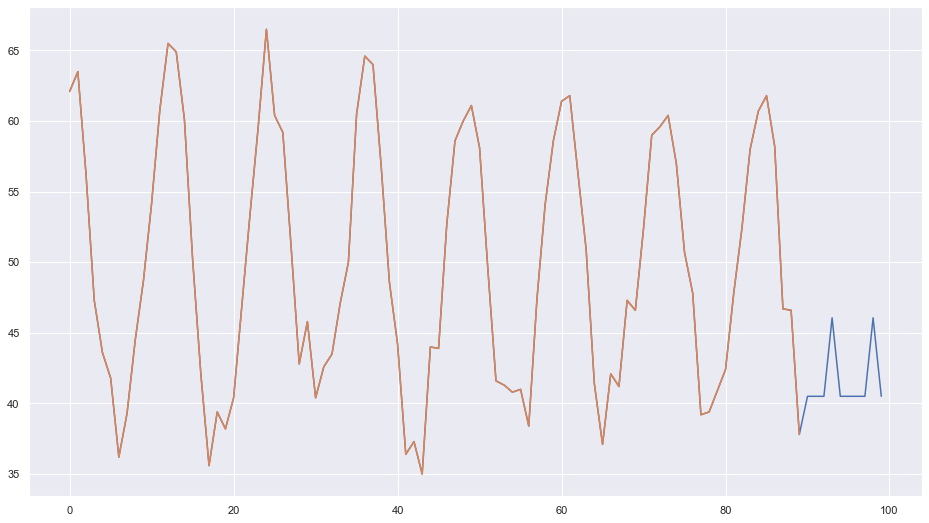

In [48]:
a = labels[-1]
prediction = []
for i in range(10):
    next_val = np.random.choice(4, p=model.transmat_[a])
    prediction.append(model.means_[next_val])

new_series = np.concatenate((values, np.array(prediction)))

plt.figure(figsize=(16,9))
plt.plot(new_series[-100:])
plt.plot(values[-90:])
plt.show()

In [50]:
series1 = pd.read_csv('Series/weekly-closings-of-the-dowjones-.csv')['Close']
values = series1.values.reshape(-1,1)

Fitting a model with 167 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 223 free scalar parameters with only 162 data points will result in a degenerate solution.


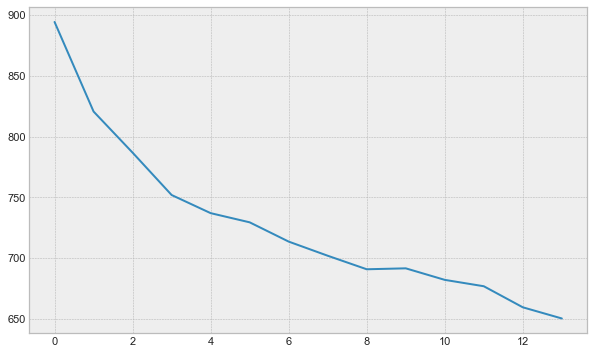

In [37]:
optimal_n = []
for n in range(1, 15):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    optimal_n.append(model.score(values))
    
with plt.style.context('bmh'):
    plt.figure(figsize=(10,6))
    plt.plot(optimal_n*np.array([-1]))

Оптимально взять n=3

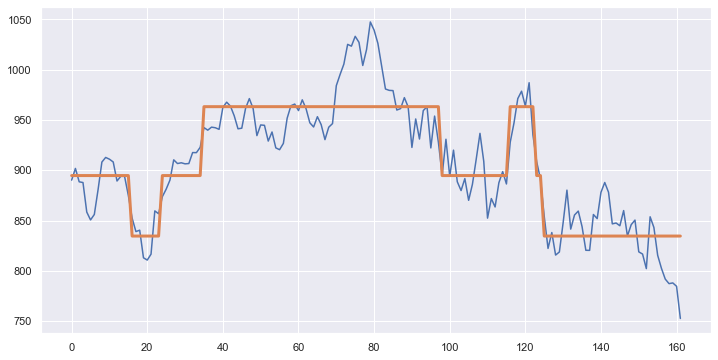

In [51]:
model = GaussianHMM(n_components=3,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

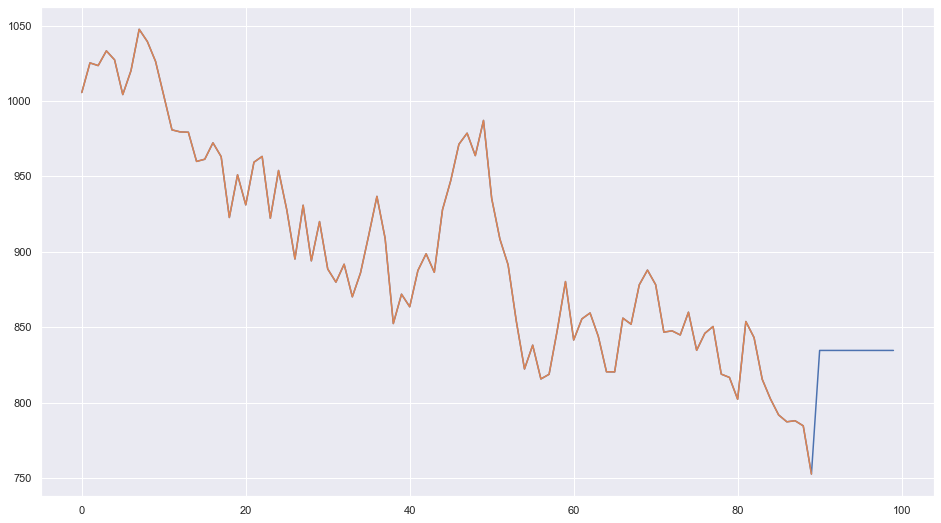

In [54]:
a = labels[-1]
prediction = []
for i in range(10):
    next_val = np.random.choice(3, p=model.transmat_[a])
    prediction.append(model.means_[next_val])

new_series = np.concatenate((values, np.array(prediction)))

plt.figure(figsize=(16,9))
plt.plot(new_series[-100:])
plt.plot(values[-90:])
plt.show()